# Cervical Cancer Risk Classification




In [ ]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors, svm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

!pip install scikit-plot
import scikitplot as skplt
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cervical_cancer_project/df_imputation.csv', index_col=0)
#df_imputation is the new CSV file that doesn't have any null values.

# Basic classification with Decision Tree

## Import Data

In [ ]:
df = df.astype('float64')

# Input : features
x = df.drop('Biopsy', axis=1)

# Output : prediction
y = df['Biopsy']

SS = StandardScaler()
df_scaled = pd.DataFrame(SS.fit_transform(x), columns = x.columns) # as scaling mandotory for KNN model

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 1)
x_train1,x_test1,y_train,y_test = train_test_split(df_scaled,y, test_size = 0.25, random_state = 1) # for knn

l= []  #List to store the various model metrics

In [ ]:
x.head(5)

,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,IUD,IUD_years,STDs,STDs_number,STDs_condylomatosis,STDs_cervical_condylomatosis,STDs_vaginal_condylomatosis,STDs_vulvo_perineal_condylomatosis,STDs_syphilis,STDs_pelvic_inflammatory_disease,STDs_genital_herpes,STDs_molluscum_contagiosum,STDs_AIDS,STDs_HIV,STDs_Hepatitis_B,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,42.0,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Decision tree model


1.   Default parameters
2.   Using Grid Search



In [ ]:
results=[]
res = {}
basic_dt = DecisionTreeClassifier().fit(x_train,y_train)

res['model'] = 'Basic DT'
ypred = basic_dt.predict(x_test)
res['Train_Score'] = basic_dt.score(x_train,y_train)
res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
res['f1score'] = metrics.f1_score(y_test,ypred)
res['recall'] = metrics.recall_score(y_test, ypred)
res['precision'] = metrics.precision_score(y_test, ypred)
res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)

results.append(res)
pd.DataFrame(results)

,model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Basic DT,1.0,0.942857,0.625,0.833333,0.5,0.891414


In [ ]:
tree = DecisionTreeClassifier()
tree_param = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,6],
    'max_features':['auto','log2'],
    'random_state':[123]
}

grid = GridSearchCV(tree, tree_param, cv=10)
best_parameter_search = grid.fit(x_train,y_train)
best_parameter_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'auto',
 'random_state': 123,
 'splitter': 'best'}

In [ ]:
dt_grid_search = DecisionTreeClassifier(criterion= 'entropy', max_depth = 3, max_features = 'auto', random_state = 123, splitter = 'best').fit(x_train,y_train)

In [ ]:
res = {}
res['model'] = 'Basic DT - Grid search'
ypred = dt_grid_search.predict(x_test)
res['Train_Score'] = dt_grid_search.score(x_train,y_train)
res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
res['f1score'] = metrics.f1_score(y_test,ypred)
res['recall'] = metrics.recall_score(y_test, ypred)
res['precision'] = metrics.precision_score(y_test, ypred)
res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
results.append(res)
pd.DataFrame(results)

,model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Basic DT,1.000000,0.942857,0.625000,0.833333,0.500000,0.891414
1,Basic DT - Grid search,0.966561,0.961905,0.750000,1.000000,0.600000,0.979798
2,Basic DT - Grid search,0.968153,0.961905,0.733333,0.916667,0.611111,0.940657


[Text(164.18076923076924, 207.55636363636364, 'X[31] <= 0.5\ngini = 0.125\nsamples = 628\nvalue = [586, 42]'),
 Text(106.23461538461538, 187.7890909090909, 'X[19] <= 0.5\ngini = 0.024\nsamples = 576\nvalue = [569, 7]'),
 Text(93.3576923076923, 168.0218181818182, 'X[27] <= 0.5\ngini = 0.021\nsamples = 575\nvalue = [569, 6]'),
 Text(57.94615384615385, 148.25454545454545, 'X[2] <= 12.5\ngini = 0.014\nsamples = 568\nvalue = [564, 4]'),
 Text(25.753846153846155, 128.48727272727274, 'X[1] <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(12.876923076923077, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(38.63076923076923, 108.72, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(90.13846153846154, 128.48727272727274, 'X[32] <= 0.5\ngini = 0.011\nsamples = 562\nvalue = [559, 3]'),
 Text(64.38461538461539, 108.72, 'X[2] <= 14.5\ngini = 0.007\nsamples = 549\nvalue = [547, 2]'),
 Text(51.50769230769231, 88.95272727272729, 'X[6] <= 2.2\ngini = 0.055\nsamples = 71\nvalue = [69,

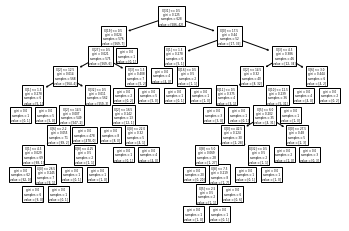

In [ ]:
from sklearn import tree
tree.plot_tree(basic_dt)


[Text(186.0, 190.26, 'X[31] <= 0.5\nentropy = 0.354\nsamples = 628\nvalue = [586, 42]'),
 Text(111.60000000000001, 135.9, 'X[8] <= 3.062\nentropy = 0.095\nsamples = 576\nvalue = [569, 7]'),
 Text(74.4, 81.53999999999999, 'X[2] <= 12.5\nentropy = 0.117\nsamples = 442\nvalue = [435, 7]'),
 Text(37.2, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(111.60000000000001, 27.180000000000007, 'entropy = 0.104\nsamples = 438\nvalue = [432, 6]'),
 Text(148.8, 81.53999999999999, 'entropy = 0.0\nsamples = 134\nvalue = [134, 0]'),
 Text(260.40000000000003, 135.9, 'X[6] <= 2.95\nentropy = 0.912\nsamples = 52\nvalue = [17, 35]'),
 Text(223.20000000000002, 81.53999999999999, 'X[3] <= 4.5\nentropy = 0.938\nsamples = 48\nvalue = [17, 31]'),
 Text(186.0, 27.180000000000007, 'entropy = 0.876\nsamples = 44\nvalue = [13, 31]'),
 Text(260.40000000000003, 27.180000000000007, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(297.6, 81.53999999999999, 'entropy = 0.0\nsamples = 4\nv

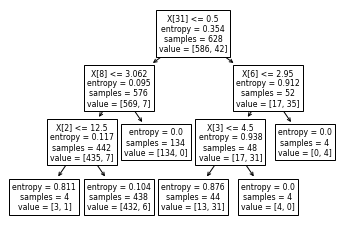

In [ ]:
tree.plot_tree(dt_grid_search)

# Sampling data

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
x_train_s, y_train_s = SMOTE(random_state=33).fit_resample(x_train, y_train.ravel())
print(sorted(Counter(y_train_s).items()))

[(0.0, 586), (1.0, 586)]


In [ ]:
res = {}
dt_def_smote = DecisionTreeClassifier().fit(x_train_s,y_train_s)
ypred = dt_def_smote.predict(x_test)
res['model'] = 'DT - SMOTE - Default'
res['Train_Score'] = dt_def_smote.score(x_train_s,y_train_s)
res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
res['f1score'] = metrics.f1_score(y_test,ypred)
res['recall'] = metrics.recall_score(y_test, ypred)
res['precision'] = metrics.precision_score(y_test, ypred)
dt_def_smote.predict_proba(x_test)
res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)

results.append(res)
pd.DataFrame(results)

,model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Basic DT,1.000000,0.942857,0.625000,0.833333,0.500000,0.891414
1,Basic DT - Grid search,0.966561,0.961905,0.750000,1.000000,0.600000,0.979798
2,Basic DT - Grid search,0.968153,0.961905,0.733333,0.916667,0.611111,0.940657
3,DT - SMOTE - Default,1.000000,0.957143,0.727273,1.000000,0.571429,0.977273


In [ ]:
tree = DecisionTreeClassifier()
tree_param = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,6],
    'max_features':['auto','log2'],
    'random_state':[123]
}

grid = GridSearchCV(tree, tree_param, cv=10)
best_parameter_search = grid.fit(x_train_s,y_train_s)
best_parameter_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'random_state': 123,
 'splitter': 'best'}

In [ ]:
res = {}
dt_def_smote = DecisionTreeClassifier(criterion= 'gini', max_depth = 5, max_features = 'auto', random_state = 123, splitter = 'best').fit(x_train_s,y_train_s)
ypred = dt_def_smote.predict(x_test)
res['model'] = 'DT - SMOTE - Grid Search'
res['Train_Score'] = dt_def_smote.score(x_train_s,y_train_s)
res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
res['f1score'] = metrics.f1_score(y_test,ypred)
res['recall'] = metrics.recall_score(y_test, ypred)
res['precision'] = metrics.precision_score(y_test, ypred)
dt_def_smote.predict_proba(x_test)
res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)

results.append(res)
pd.DataFrame(results)

,model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Basic DT,1.000000,0.942857,0.625000,0.833333,0.500000,0.891414
1,Basic DT - Grid search,0.966561,0.961905,0.750000,1.000000,0.600000,0.979798
2,Basic DT - Grid search,0.968153,0.961905,0.733333,0.916667,0.611111,0.940657
3,DT - SMOTE - Default,1.000000,0.957143,0.727273,1.000000,0.571429,0.977273
4,DT - SMOTE - Grid Search,0.983788,0.961905,0.750000,1.000000,0.600000,0.979798


# Feature selection RFE

### SMOTE + RFE

In [ ]:
from sklearn.feature_selection import RFE

best_fea=[]
for i in range(1,df.shape[1]):
    fea_res={}
    model = RFE(DecisionTreeClassifier(),i).fit(x_train_s,y_train_s)
    fea_res['N of features'] = x.columns[model.support_].shape
    dt = DecisionTreeClassifier()
    dt.fit(x_train_s,y_train_s)
    y_pred = dt.predict(x_test)
    fea_res['roc_auc'] =  metrics.roc_auc_score(y_test,y_pred)
    fea_res['Features'] = x.columns[model.support_]
    best_fea.append(fea_res)

to_save = pd.DataFrame(best_fea)
to_save.to_csv('rfe_smote.csv')

In [ ]:
rfe_dt = ['Age', 'No_of_sex_partner', 'First_sexual_intercourse', 'No_pregnancies', 'Smokes_packs_yr', 'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD_years', 'STDs_number', 'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum', 'STDs_AIDS', 'Dx_CIN']
len(rfe_dt)

15

In [ ]:
x_train_s = pd.DataFrame(x_train_s, columns = x.columns)
y_train_s = pd.DataFrame(y_train_s, columns = ['Biopsy'])
x_test = pd.DataFrame(x_test, columns=x.columns)

rfe_dt_df_train = x_train_s[rfe_dt]
rfe_dt_df_test = x_test[rfe_dt]

res = {}
model = DecisionTreeClassifier().fit(rfe_dt_df_train,y_train_s)
ypred = model.predict(rfe_dt_df_test)
res['model'] = 'DT + RFE + SMOTE'
res['Train_Score'] = model.score(rfe_dt_df_train,y_train_s.values)
res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
res['f1score'] = metrics.f1_score(y_test,ypred)
res['recall'] = metrics.recall_score(y_test, ypred)
res['precision'] = metrics.precision_score(y_test, ypred)
model.predict_proba(rfe_dt_df_test)
res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)

results.append(res)
pd.DataFrame(results)

,model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Basic DT,0.998408,0.895238,0.153846,0.166667,0.142857,0.553030
1,Basic DT - Grid search,0.941083,0.942857,0.142857,0.083333,0.500000,0.539141
2,DT - SMOTE - Default,0.999147,0.890476,0.148148,0.166667,0.133333,0.550505
3,DT - SMOTE - Grid Search,0.829352,0.866667,0.125000,0.166667,0.100000,0.537879
4,DT - SMOTE - Grid Search,0.829352,0.866667,0.125000,0.166667,0.100000,0.537879
5,DT + RFE + SMOTE,0.999147,0.880952,0.074074,0.083333,0.066667,0.506313


### RFE only
*Without sampling data*

In [ ]:
best_fea2=[]
for i in range(1,df.shape[1]):
    fea_res={}
    model = RFE(DecisionTreeClassifier(),i).fit(x_train,y_train)

    fea_res['N of features'] = x.columns[model.support_].shape
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    fea_res['roc_auc'] =  metrics.roc_auc_score(y_test,y_pred)
    fea_res['Features'] = x.columns[model.support_]
    print(fea_res)
    best_fea2.append(fea_res)

to_save = pd.DataFrame(best_fea2)
to_save.to_csv('rfe_only.csv')

{'N of features': (1,), 'roc_auc': 0.5921717171717172, 'Features': Index(['Age'], dtype='object')}
{'N of features': (2,), 'roc_auc': 0.5871212121212122, 'Features': Index(['Age', 'Hormonal_Contraceptives_years'], dtype='object')}
{'N of features': (3,), 'roc_auc': 0.5454545454545454, 'Features': Index(['Age', 'No_of_sex_partner', 'Hormonal_Contraceptives_years'], dtype='object')}
{'N of features': (4,), 'roc_auc': 0.5530303030303031, 'Features': Index(['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'Hormonal_Contraceptives_years'],
      dtype='object')}
{'N of features': (5,), 'roc_auc': 0.5871212121212122, 'Features': Index(['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Hormonal_Contraceptives_years'],
      dtype='object')}
{'N of features': (6,), 'roc_auc': 0.5454545454545454, 'Features': Index(['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Smokes_packs_yr', 'Hormonal_Contraceptives_years'],
  

In [ ]:
rfe_dt = ['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD_years',
       'STDs_genital_herpes', 'STDs_molluscum_contagiosum', 'STDs_AIDS',
       'STDs_HIV', 'STDs_No_of_diagnosis', 'Dx_CIN']

len(rfe_dt)

16

In [ ]:
x_train_rfe = pd.DataFrame(x_train, columns = x.columns)
y_train_rfe = pd.DataFrame(y_train, columns = ['Biopsy'])
x_test = pd.DataFrame(x_test, columns=x.columns)

rfe_dt_df_train = x_train_rfe[rfe_dt]
rfe_dt_df_test = x_test[rfe_dt]

res = {}
model = DecisionTreeClassifier().fit(rfe_dt_df_train,y_train)
ypred = model.predict(rfe_dt_df_test)
res['model'] = 'DT + RFE'
res['Train_Score'] = model.score(rfe_dt_df_train,y_train.values)
res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
res['f1score'] = metrics.f1_score(y_test,ypred)
res['recall'] = metrics.recall_score(y_test, ypred)
res['precision'] = metrics.precision_score(y_test, ypred)
model.predict_proba(rfe_dt_df_test)
res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)

results.append(res)
pd.DataFrame(results)

,model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Basic DT,0.998408,0.890476,0.148148,0.166667,0.133333,0.550505
1,Basic DT - Grid search,0.941083,0.942857,0.142857,0.083333,0.500000,0.539141
2,DT - SMOTE - Default,0.999147,0.895238,0.153846,0.166667,0.142857,0.553030
3,DT - SMOTE - Grid Search,0.829352,0.866667,0.125000,0.166667,0.100000,0.537879
4,DT + RFE + SMOTE,0.999147,0.852381,0.060606,0.083333,0.047619,0.491162
5,DT + RFE,0.998408,0.871429,0.228571,0.333333,0.173913,0.618687


# Hyperparameter tuning

*Used Grid Search Cross Validation for Decision Trees and Randomized Search Cross Validation for Random Forest (GridSearchCV may taker longer time) for chosing the best paramter values*

RFE+SMOTE+GRIDSEARCH

In [ ]:
tree = DecisionTreeClassifier()
tree_param = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[3,4,5,6],
    'max_features':['auto','log2'],
    'random_state':[123]
}

grid = GridSearchCV(tree, tree_param, cv=10)
best_parameter_search = grid.fit(rfe_dt_df_train,y_train)
best_parameter_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'random_state': 123,
 'splitter': 'best'}

In [ ]:
res = {}
mo = DecisionTreeClassifier(criterion= 'gini', max_depth = 6, max_features = 'auto', random_state = 123, splitter = 'best').fit(rfe_dt_df_train,y_train)
ypred = model.predict(rfe_dt_df_test)
res['model'] = 'DT + SMOTE + RFE + GridSearch'
res['Train_Score'] = mo.score(rfe_dt_df_train,y_train)
res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
res['f1score'] = metrics.f1_score(y_test,ypred)
res['recall'] = metrics.recall_score(y_test, ypred)
res['precision'] = metrics.precision_score(y_test, ypred)
mo.predict_proba(rfe_dt_df_test)
res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)

results.append(res)

In [ ]:
pd.DataFrame(results)

,model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Basic DT,1.000000,0.947619,0.666667,0.916667,0.523810,0.933081
1,Basic DT - Grid search,0.968153,0.961905,0.733333,0.916667,0.611111,0.940657
2,DT - SMOTE - Default,1.000000,0.942857,0.647059,0.916667,0.500000,0.930556
3,DT - SMOTE - Grid Search,0.983788,0.961905,0.750000,1.000000,0.600000,0.979798
4,DT + RFE + SMOTE,1.000000,0.947619,0.666667,0.916667,0.523810,0.933081
5,DT + RFE,1.000000,0.952381,0.687500,0.916667,0.550000,0.935606
6,DT + SMOTE + RFE + GridSearch,0.979299,0.952381,0.687500,0.916667,0.550000,0.935606


# Bagging classifier; hyper tuned decision tree

In [ ]:
res = {}
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion= 'gini', max_depth = 6, max_features = 'auto', random_state = 123, splitter = 'random')).fit(rfe_dt_df_train, y_train)
ypred = model.predict(rfe_dt_df_test)
res['model'] = 'Bagged Decision Tree with Hyperparameter'
res['Train_Score'] = model.score(rfe_dt_df_train,y_train)
res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
res['f1score'] = metrics.f1_score(y_test,ypred)
res['recall'] = metrics.recall_score(y_test, ypred)
res['precision'] = metrics.precision_score(y_test, ypred)
model.predict_proba(rfe_dt_df_test)
res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)
results.append(res)

AdaBoost based on decision tree

In [ ]:
res = {}
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion= 'gini', max_depth = 6, max_features = 'auto', random_state = 123, splitter = 'random')).fit(rfe_dt_df_train, y_train)
ypred = model.predict(rfe_dt_df_test)
res['model'] = 'Decision Tree ADA Boost with Hyperparameter'
res['Train_Score'] = model.score(rfe_dt_df_train,y_train)
res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
res['f1score'] = metrics.f1_score(y_test,ypred)
res['recall'] = metrics.recall_score(y_test, ypred)
res['precision'] = metrics.precision_score(y_test, ypred)
model.predict_proba(rfe_dt_df_test)
res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)

results.append(res)

In [ ]:
res = {}
model = GradientBoostingClassifier(learning_rate=0.01,random_state=1).fit(rfe_dt_df_train, y_train)
ypred = model.predict(rfe_dt_df_test)
res['model'] = 'Gradient Boost'
res['Train_Score'] = model.score(rfe_dt_df_train,y_train)
res['Test_accuracy'] = metrics.accuracy_score(y_test,ypred)
res['f1score'] = metrics.f1_score(y_test,ypred)
res['recall'] = metrics.recall_score(y_test, ypred)
res['precision'] = metrics.precision_score(y_test, ypred)
model.predict_proba(rfe_dt_df_test)
res['roc_auc'] = metrics.roc_auc_score(y_test,ypred)

results.append(res)

In [ ]:
pd.DataFrame(results)

,model,Train_Score,Test_accuracy,f1score,recall,precision,roc_auc
0,Basic DT,1.000000,0.947619,0.666667,0.916667,0.523810,0.933081
1,Basic DT - Grid search,0.968153,0.961905,0.733333,0.916667,0.611111,0.940657
2,DT - SMOTE - Default,1.000000,0.942857,0.647059,0.916667,0.500000,0.930556
3,DT - SMOTE - Grid Search,0.983788,0.961905,0.750000,1.000000,0.600000,0.979798
4,DT + RFE + SMOTE,1.000000,0.947619,0.666667,0.916667,0.523810,0.933081
5,DT + RFE,1.000000,0.952381,0.687500,0.916667,0.550000,0.935606
6,DT + SMOTE + RFE + GridSearch,0.979299,0.952381,0.687500,0.916667,0.550000,0.935606
7,Bagged Decision Tree with Hyperparameter,0.979299,0.952381,0.615385,0.666667,0.571429,0.818182
8,Decision Tree ADA Boost with Hyperparameter,1.000000,0.952381,0.666667,0.833333,0.555556,0.896465
9,Gradient Boost,0.979299,0.961905,0.714286,0.833333,0.625000,0.901515


# Feature importance

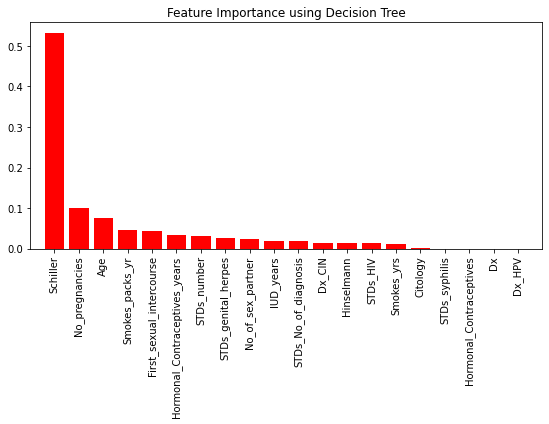

In [ ]:
fig = plt.figure(figsize=(15,6))
# Feature importance for Decision Tree
basic_dt.fit(x_train, y_train)
basic_dt.score(x_test, y_test)

ax2 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(basic_dt, feature_names=x.columns,
                                          title="Feature Importance using Decision Tree",
                                          x_tick_rotation=90, ax=ax2);
plt.tight_layout()

# PCA

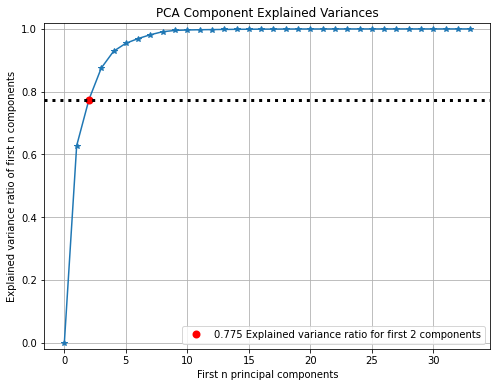

In [ ]:
#PCA Components Explained Variance
pca = PCA(random_state=1)
pca.fit(x_train)

skplt.decomposition.plot_pca_component_variance(pca, figsize=(8,6));

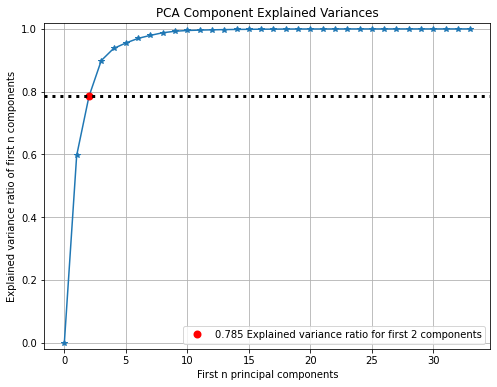

In [ ]:
#PCA Components Explained Variance
pca = PCA(random_state=1)
pca.fit(x_train_s)

skplt.decomposition.plot_pca_component_variance(pca, figsize=(8,6));

# Feature selection using RFECV

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

Optimal number of features : 22


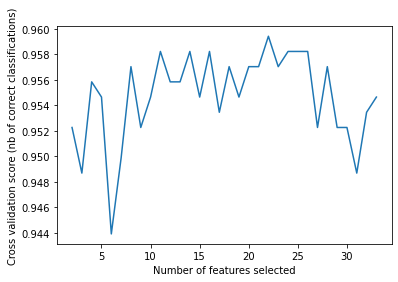

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


min_features_to_select = 2  # Minimum number of features to consider
rfecv = RFECV(estimator=basic_dt, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(x, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

# Best classifier : DT + SMOTE + GRID SEARCH


## Plot metrics


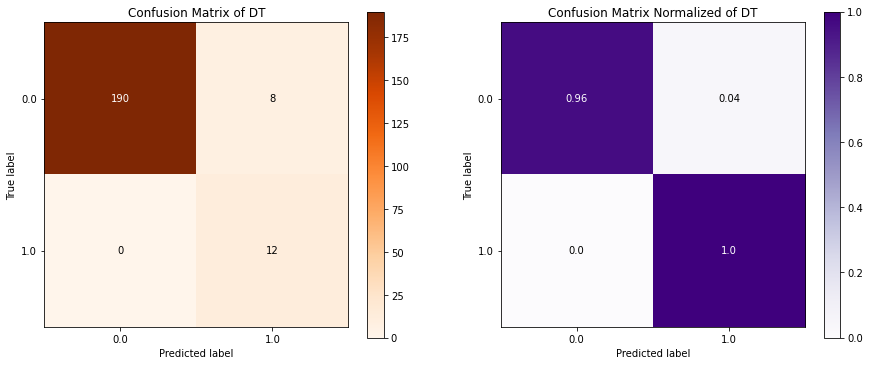

In [ ]:
best = DecisionTreeClassifier(criterion= 'gini', max_depth = 5, max_features = 'auto', random_state = 123, splitter = 'best').fit(x_train_s,y_train_s)
Y_test_pred = best.predict(x_test)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, Y_test_pred, title="Confusion Matrix of DT", cmap="Oranges", ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test, Y_test_pred, normalize=True, title="Confusion Matrix Normalized of DT", cmap="Purples", ax=ax2);

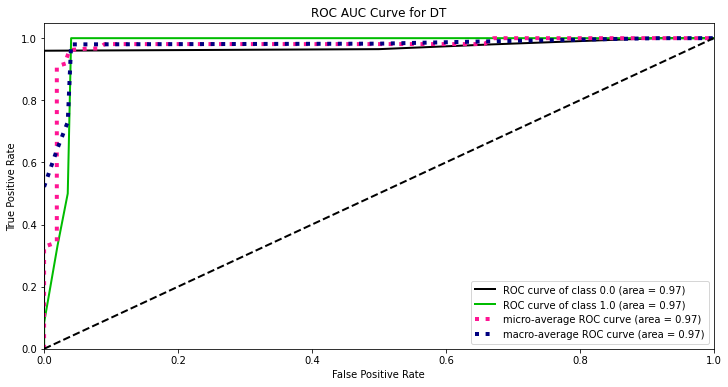

In [ ]:
Y_test_probs = best.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,title="ROC AUC Curve for DT", figsize=(12,6));

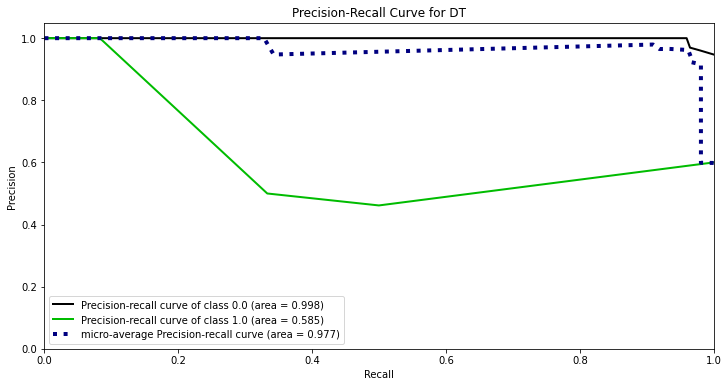

In [ ]:
Y_test_probs = best.predict_proba(x_test)

skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs, title="Precision-Recall Curve for DT", figsize=(12,6));